# Preprocessing pipeline for CoVET
## input : raw extracted voltage traces from NIS software (.csv)
## output : dF/F0 according to ROI (.csv)

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### load files, add exp_date tag

In [4]:
all_files = os.listdir()
csv_files = [file for file in all_files if file.endswith('.csv')&file.startswith('Grid')]
print(csv_files)

['Grid2_ROI1.csv', 'Grid2_ROI2.csv', 'Grid2_ROI3.csv']


In [5]:
exp_date = '250329'

### format ROI name, align each traces to stim, calculate dF/F0

In [8]:
for file in csv_files:
    
    # 1 parse data, rmv dark
    df = pd.read_csv(file)
    fname = file
    

    numNeuron = df.shape[1]-5

    for i in range(numNeuron):
        new_col_name = exp_date + "_" + fname[:-4] + "_" + df.columns[i+5][:-6]
        new_col_name = new_col_name.replace("1001","1")
        new_col_name = new_col_name.replace("2001", "2")
        new_col_name = new_col_name.replace("3001", "3")

        
        df.rename(columns={df.columns[i+5]:new_col_name}, inplace = True)

    df.drop(df.columns[0:5], axis = 1, inplace = True)    
    df = df-100
    
    
    # 2 normalize data
    df_n = pd.DataFrame()

    for column in df.columns:
        data = df[column]
        F0 = data[50:75].mean()
        df_n[column] = (data - F0) / F0
    
    ### 3 find peaks and timing 
     

    start = 150
    end = start + 600

    # adjust it if necessary (trigger mistake..etc.)

    print(start, end)

    ### 4 
    df_sync = df_n.loc[start:end-1]
    
    ### 5 save
    df_sync.to_csv(exp_date+'_refined_'+ file)

    
    

150 750
150 750
150 750


### Check if alignment is OK by plotting

In [6]:
#check
import os
all_files = os.listdir()
processed = [file for file in all_files if file.endswith('.csv')&file.startswith(exp_date+'_refined')]
print(processed)

['250329_refined_Grid2_ROI1.csv', '250329_refined_Grid2_ROI2.csv', '250329_refined_Grid2_ROI3.csv']


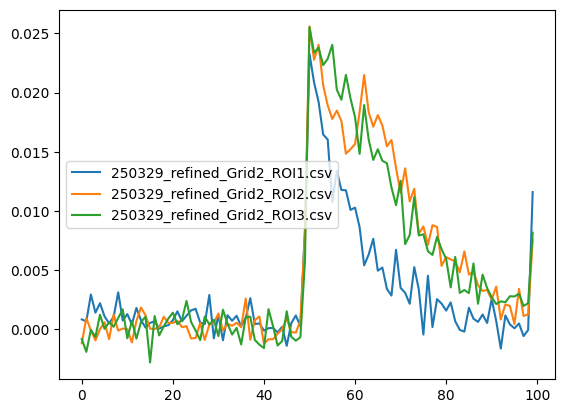

In [8]:
for file in processed:
    df = pd.read_csv(file)
    fname = file
    df.drop(df.columns[0], axis = 1, inplace = True)  
    avg = df.mean(axis=1)

    plt.plot(np.array(avg[0:100]), label = fname)
    plt.legend()